In [34]:
# import the necessary packages
from __future__ import print_function
import numpy as np
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
from imutils import contours
import cv2
from skimage import measure
from matplotlib import pyplot as plt
%matplotlib inline

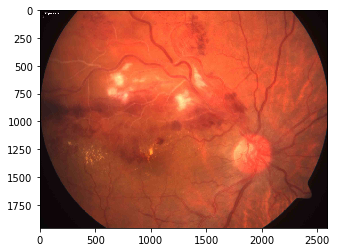

In [39]:
image = cv2.imread('../Dataset/brvo (2).jpg')
color = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#shifted = cv2.pyrMeanShiftFiltering(gray, 21, 51)
plt.imshow(color)

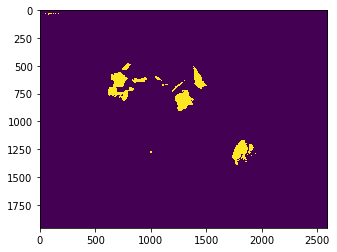

In [40]:
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 135,255, cv2.THRESH_BINARY)[1]

plt.imshow(thresh)

In [41]:
cv2.imwrite('temp.jpg', thresh)

True

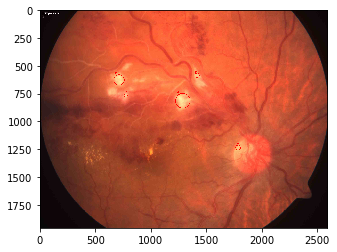

In [42]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]

# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)

# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
 
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 300:
		mask = cv2.add(mask, labelMask)
        
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]
 
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
	(x, y, w, h) = cv2.boundingRect(c)
	((cX, cY), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(cX), int(cY)), int(radius),
		(0, 0, 255), 3)
	cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)    
    
    
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [43]:
cv2.imwrite('temp.jpg', image)

True